In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Train Dataset
df = pd.read_excel(r"c:\Users\LENOVO\Desktop\Data_Train_set.xlsx")

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
# Load the test dataset
dff = pd.read_excel(r"c:\Users\LENOVO\Desktop\Test_Set_Data.xlsx")

In [5]:
dff

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In this we need to predict the flight price so  it is continuous data that means it is regression problem

### 1.Train dataset:
Preprocessing and EDA

In [6]:
#Checking shape of Train dataset
df.shape

(10683, 11)

In [7]:
#Checkig  all the column names
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
#Checking the data types
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

As we see Except Price all are object type datatype

In [9]:
#Checking the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
# Checking for null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

As we see Route and Total_Stops having null values we need to fill these null value

In [11]:
#Lets check the value count of each column 
for i in df.columns:
        print(df[i].value_counts())
        print('***************************************')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
***************************************
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     

In [12]:
#Checking for empty observations in Target dataset
df.loc[df['Price'] == " "]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


There is no empty observations in target columns

In [13]:
# Fill the Nan
#Replacing nan values with mode as columns are categorical
df["Route"] = df["Route"].fillna(df["Route"].mode()[0])
df["Total_Stops"] = df["Total_Stops"].fillna(df["Total_Stops"].mode()[0])

In [14]:
# checking null values again
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

As we see there is no nan value in our dataset

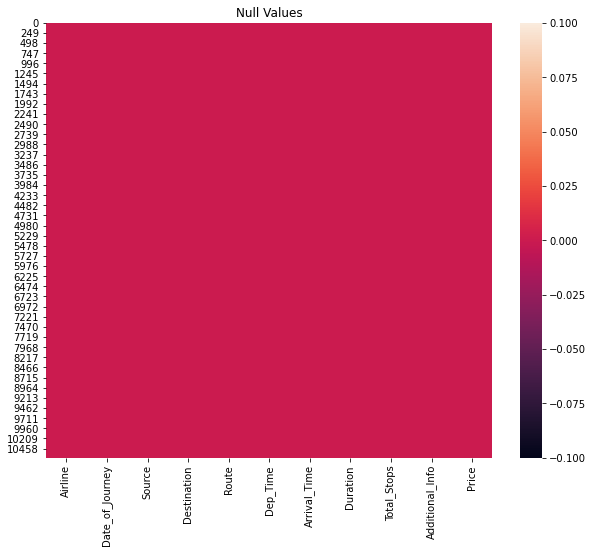

In [15]:
# lets visualize the null value
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [16]:
#Converting object data type to datetime as we have 3 column
df['Date_of_Journey'] =  pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] =  pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] =  pd.to_datetime(df['Arrival_Time'])

In [17]:
# checking the data types of all columns again
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [18]:
#Extracting year
df["Journey_Year"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.year

#Extracting month
df["Journey_Month"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

#Extracting day
df["Journey_Day"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [19]:
#Droping Date of journey column after extraction
df = df.drop(["Date_of_Journey"],axis=1)

In [20]:
#Extracting Duration column using Arrival_Time and Dep_Time
Difference = (df["Arrival_Time"]-df["Dep_Time"])
Difference_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600
    Difference_list.append(duration)
df["Duration"] = Difference_list

In [21]:
#Extracting hours and minutes from Dep_time

#Extracting Hours
df["Dep_Hour"]=pd.to_datetime(df["Dep_Time"]).dt.hour

#Extracting Hours
df["Dep_Min"]=pd.to_datetime(df["Dep_Time"]).dt.minute

In [22]:
df = df.drop(["Dep_Time"],axis=1)

In [23]:
#Extracting hours and minutes from Arrival_Time

#Extracting Hours
df["Arrival_Hour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour

#Extracting Hours
df["Arrival_Min"]=pd.to_datetime(df["Arrival_Time"]).dt.minute

In [24]:
df = df.drop(["Arrival_Time"],axis=1)

In [25]:
# lets print the dataset
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2.833333,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7.416667,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19.000000,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.416667,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4.750000,1 stop,No info,13302,2019,1,3,16,50,21,35


In [26]:
#lets check the value counts now
for i in df.columns:
       print(df[i].value_counts())
       print('****************************************')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
****************************************
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
****************************************
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
****************************************
DEL → BOM → COK                      2377
BLR → DEL                            1552
CCU → BOM

In [27]:
# we also drop Journey_year column as it is having same value
df = df.drop(["Journey_Year"],axis=1)

In [28]:
# we can do grouping also for seveal data
df["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)

df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)

df["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [29]:
#Grouping Destination column
df["Destination"].replace("New Delhi","Delhi",inplace=True)

In [30]:
df["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)

df["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)

df["Additional_Info"].replace("No Info","No info",inplace=True)

In [31]:
#Lets assign values for Total_Stops column
df.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace = True)
 

In [32]:
#lets check description of dataset
df.describe()

,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,8.206754,0.824207,9087.064121,5.534775,12.682205,12.490686,24.411214,13.348778,24.690630
std,6.387288,0.675199,4611.359167,2.987489,8.803701,5.748650,18.767980,6.859125,16.506036
min,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,2.750000,0.000000,5277.000000,3.000000,5.000000,8.000000,5.000000,8.000000,10.000000
50%,6.333333,1.000000,8372.000000,5.000000,6.000000,11.000000,25.000000,14.000000,25.000000
75%,12.583333,1.000000,12373.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000
max,23.916667,4.000000,79512.000000,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000


### Visualization

In [33]:
# lets divide the categorical and numerical column and check data distribution for numerical column
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


In [34]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Duration', 'Total_Stops', 'Price', 'Journey_Month', 'Journey_Day', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


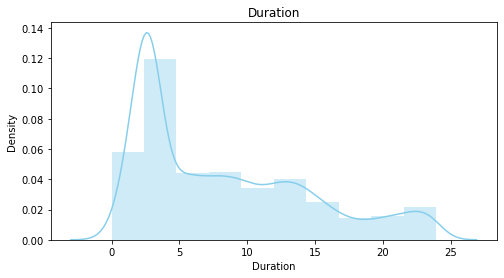

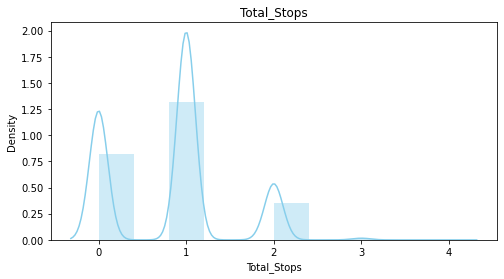

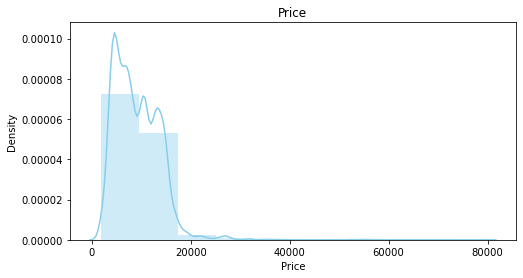

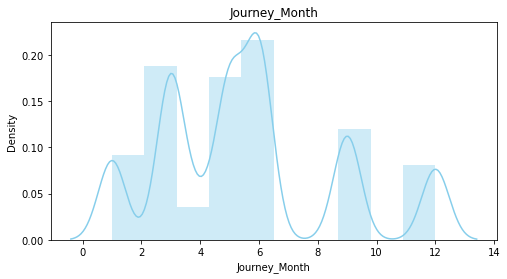

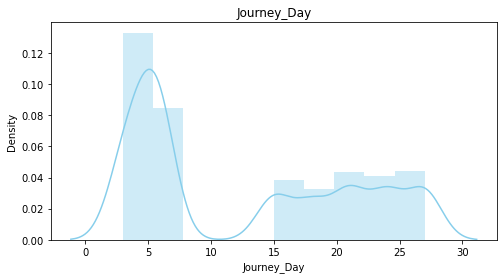

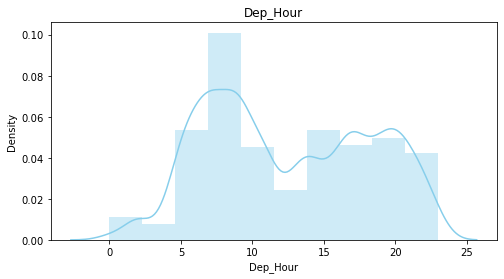

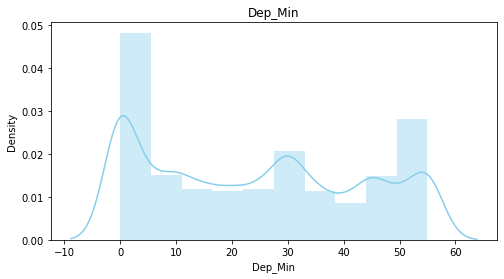

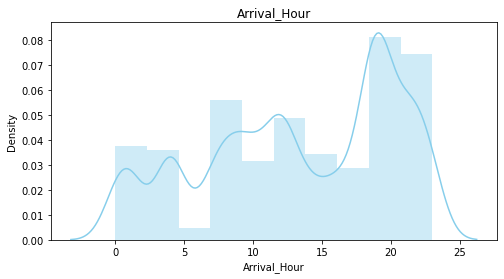

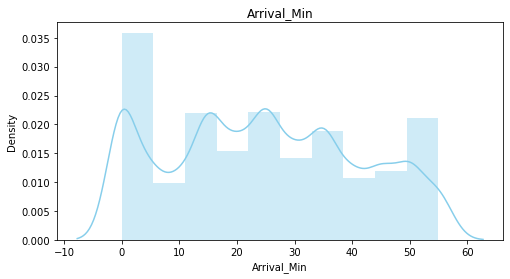

In [35]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="Skyblue")
    plt.title(i)
    plt.show()

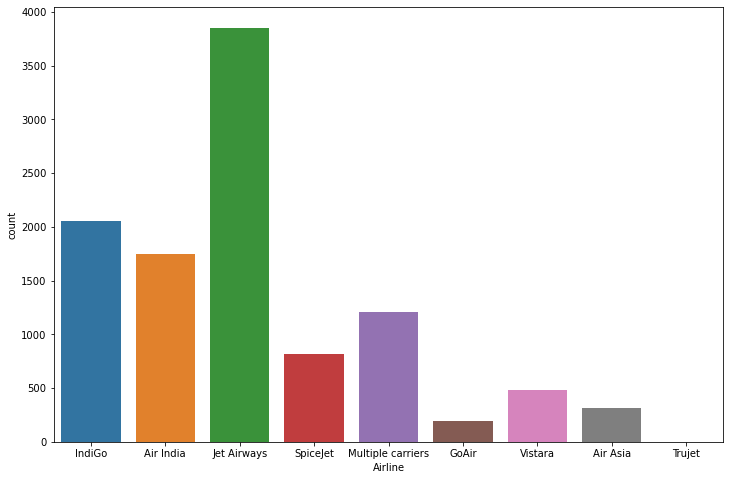

In [56]:
#Count plot for Airline column
plt.figure(figsize=[12,8])
sns.countplot(df['Airline'])
plt.show()

As we see count for Jet Airways is more as compare to other airlines

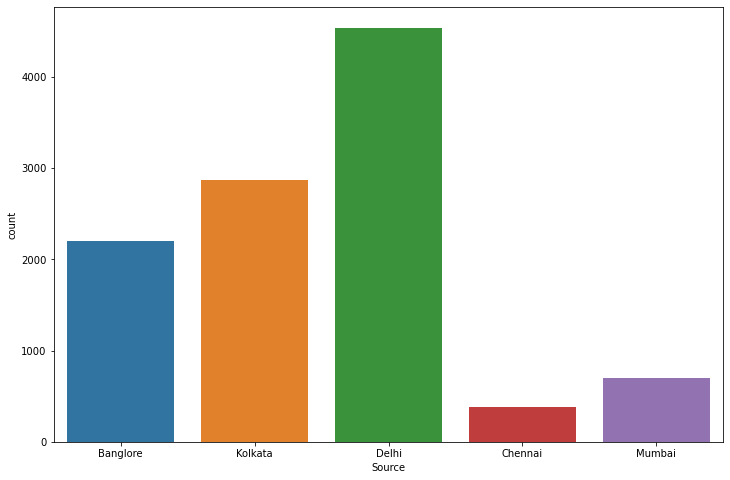

In [57]:
#Count plot for Source column
plt.figure(figsize=[12,8])
sns.countplot(df['Source'])
plt.show()

From this plot we can say that Delhi is taken as source in maximum airlines where as Chennai has minimmum count 

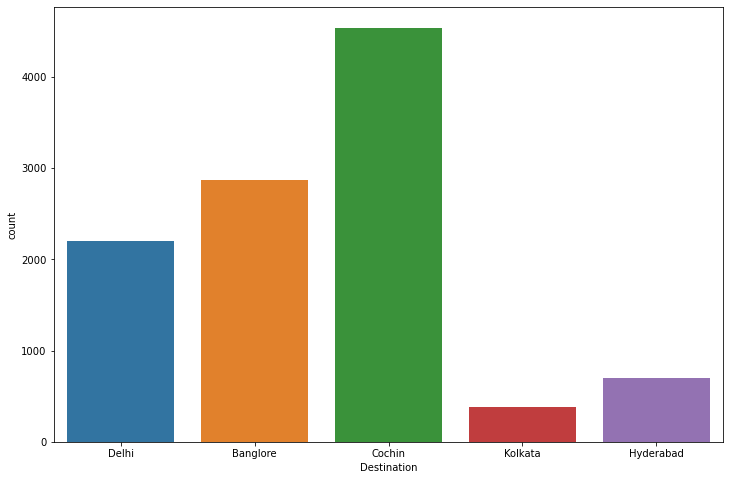

In [58]:
#Count plot for Destination column
plt.figure(figsize=[12,8])
sns.countplot(df['Destination'])
plt.show()

Cochin is maximum airlines for destination and for few airlines kolkata is the destination

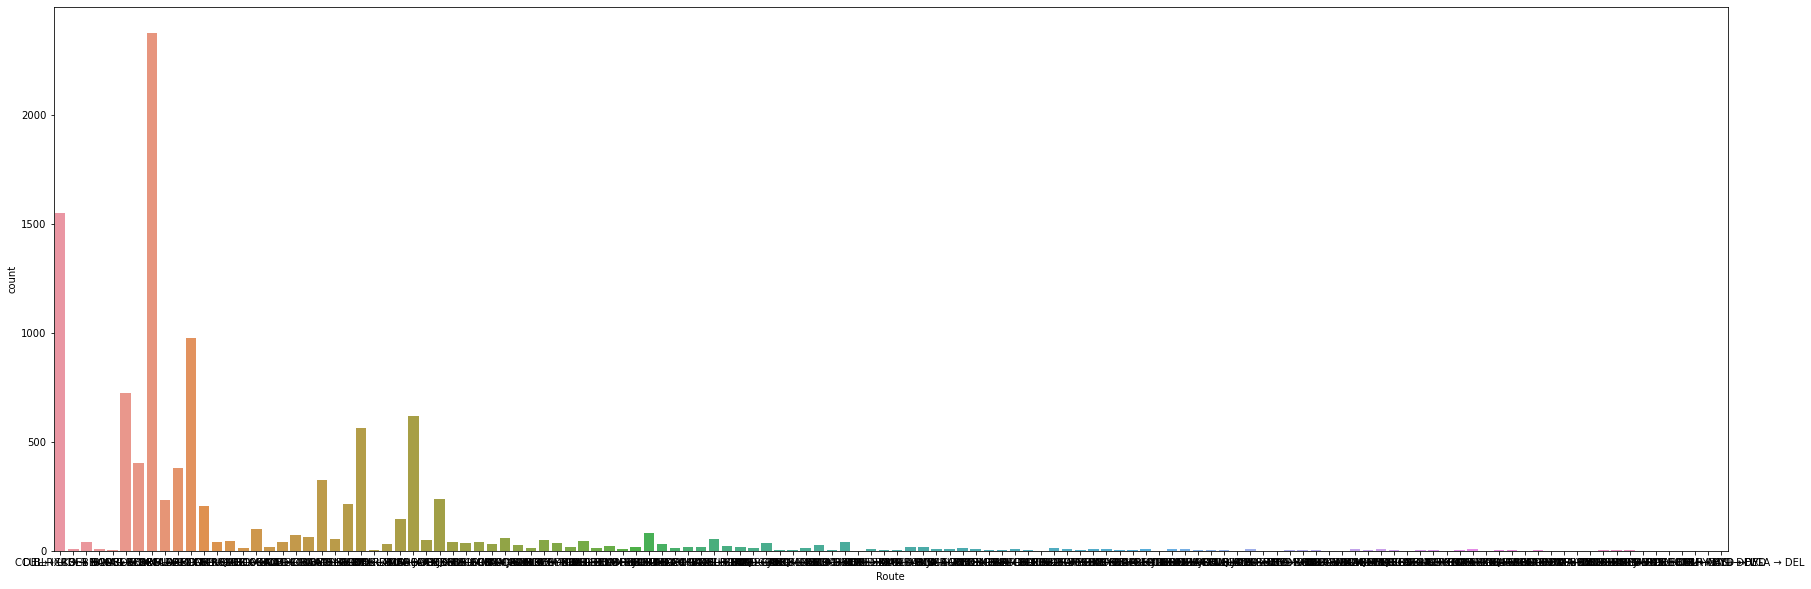

In [59]:
#count plot for route column
plt.figure(figsize=[30,10])
sns.countplot(df['Route'])
plt.show()

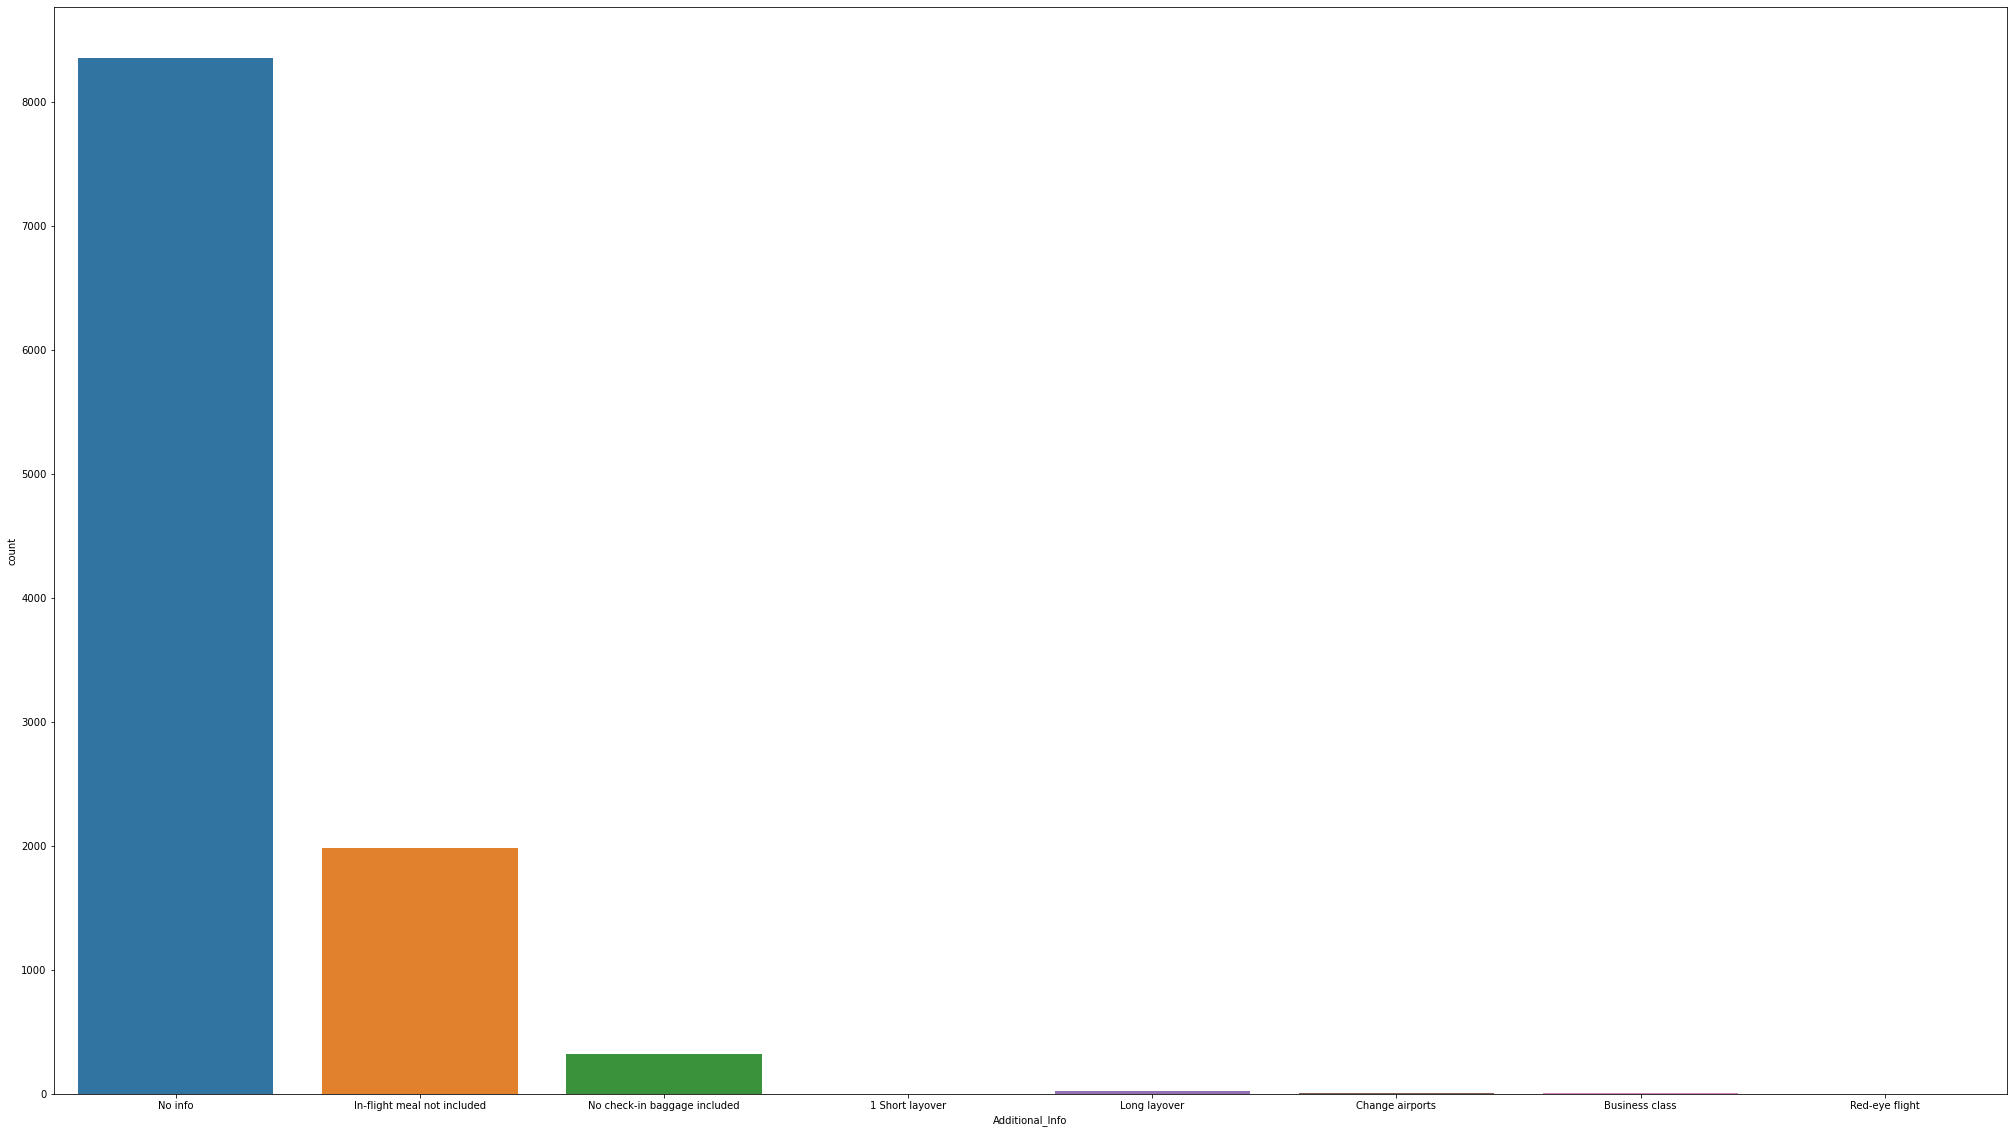

In [60]:
#Count plot for additional info column
plt.figure(figsize=[35,20])
sns.countplot(df['Additional_Info'])
plt.show()

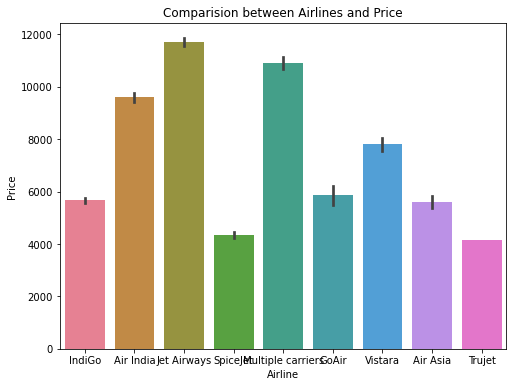

In [61]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Airlines and Price')
sns.barplot(df['Airline'],df['Price'],data=df,palette="husl")
plt.show()

In Air India, Multiple carriers and Jet Airways the price is high they look costly.
Trujet and Spicejet are cheaper compared to other airlines.

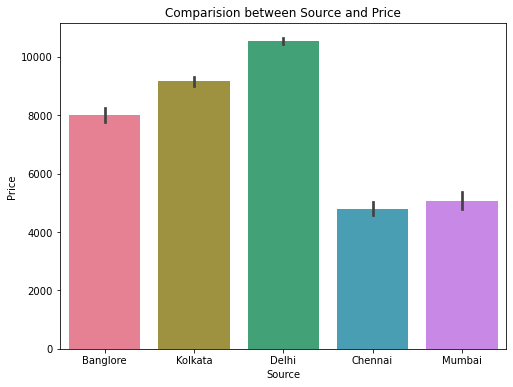

In [62]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Source and Price')
sns.barplot(df['Source'],df['Price'],data=df,palette="husl")
plt.show()

Airline those having source Delhi Kolkata and Banglore are costly

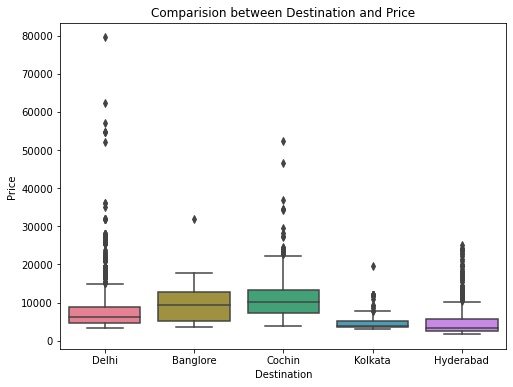

In [63]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Destination and Price')
sns.boxplot(df['Destination'],df['Price'],data=df,palette="husl")
plt.show()

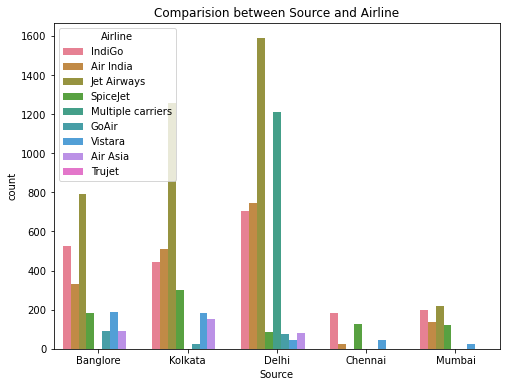

In [64]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Source and Airline')
sns.countplot(x="Source",hue="Airline",data=df,palette="husl")
plt.show()

Air india is having highest price is source is delhi

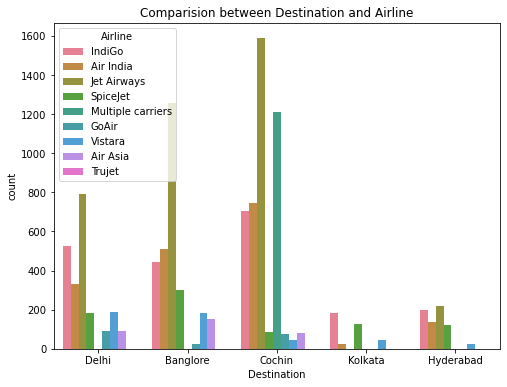

In [65]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Destination and Airline')
sns.countplot(x="Destination",hue="Airline",data=df,palette="husl")
plt.show()

If destination is Cochin air India having highest price

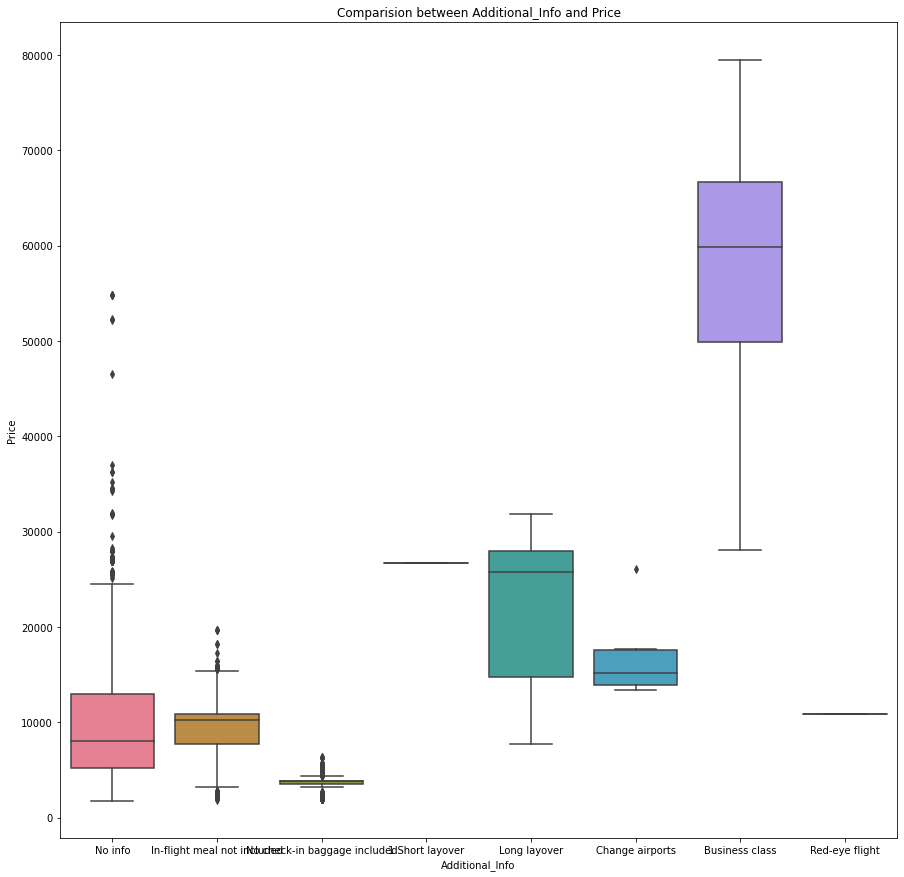

In [66]:
plt.figure(figsize=[15,15])
plt.title('Comparision between Additional_Info and Price')
sns.boxplot(df['Additional_Info'],df['Price'],data=df,palette="husl")
plt.show()

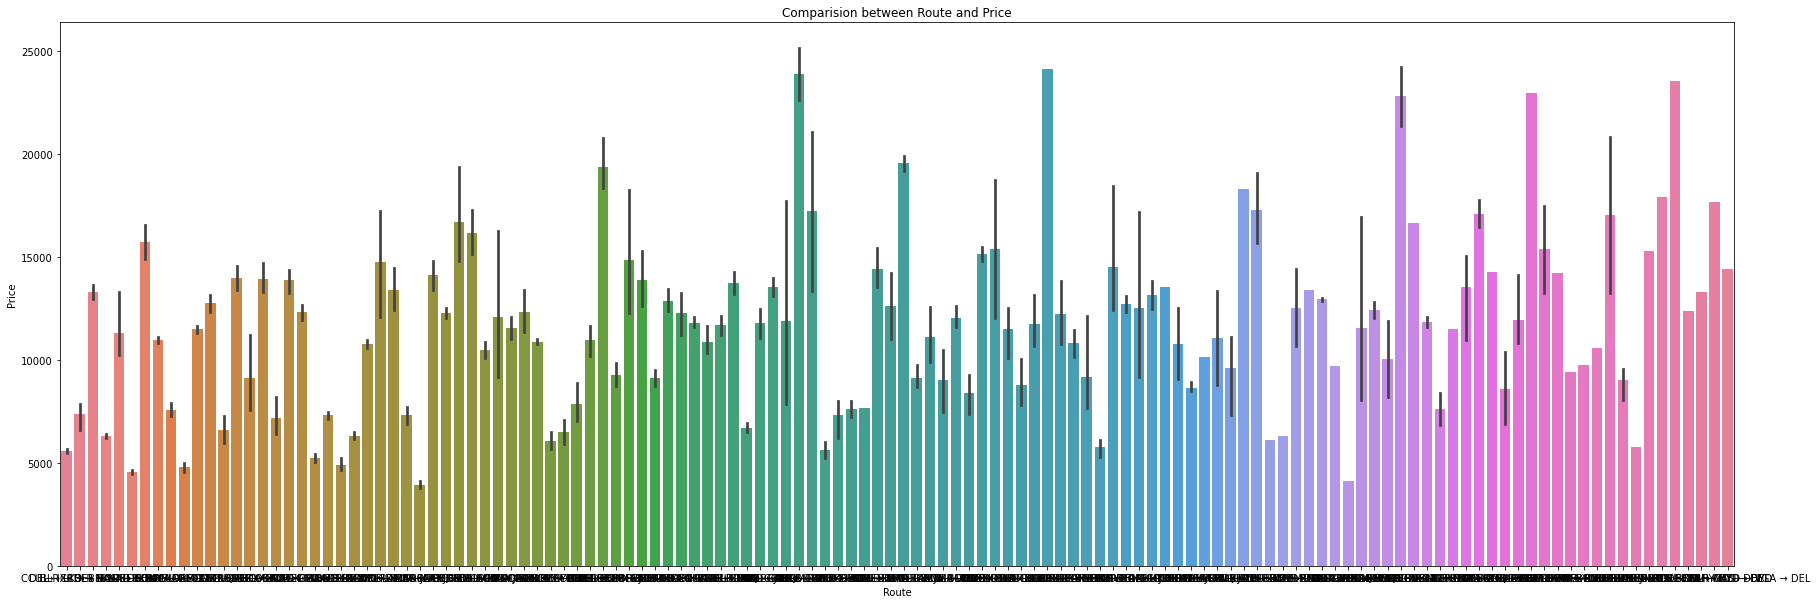

In [67]:
#Comparision between features using box plot
plt.figure(figsize=[30,10])
plt.title('Comparision between Route and Price')
sns.barplot(df['Route'],df['Price'],data=df,palette="husl")
plt.show()

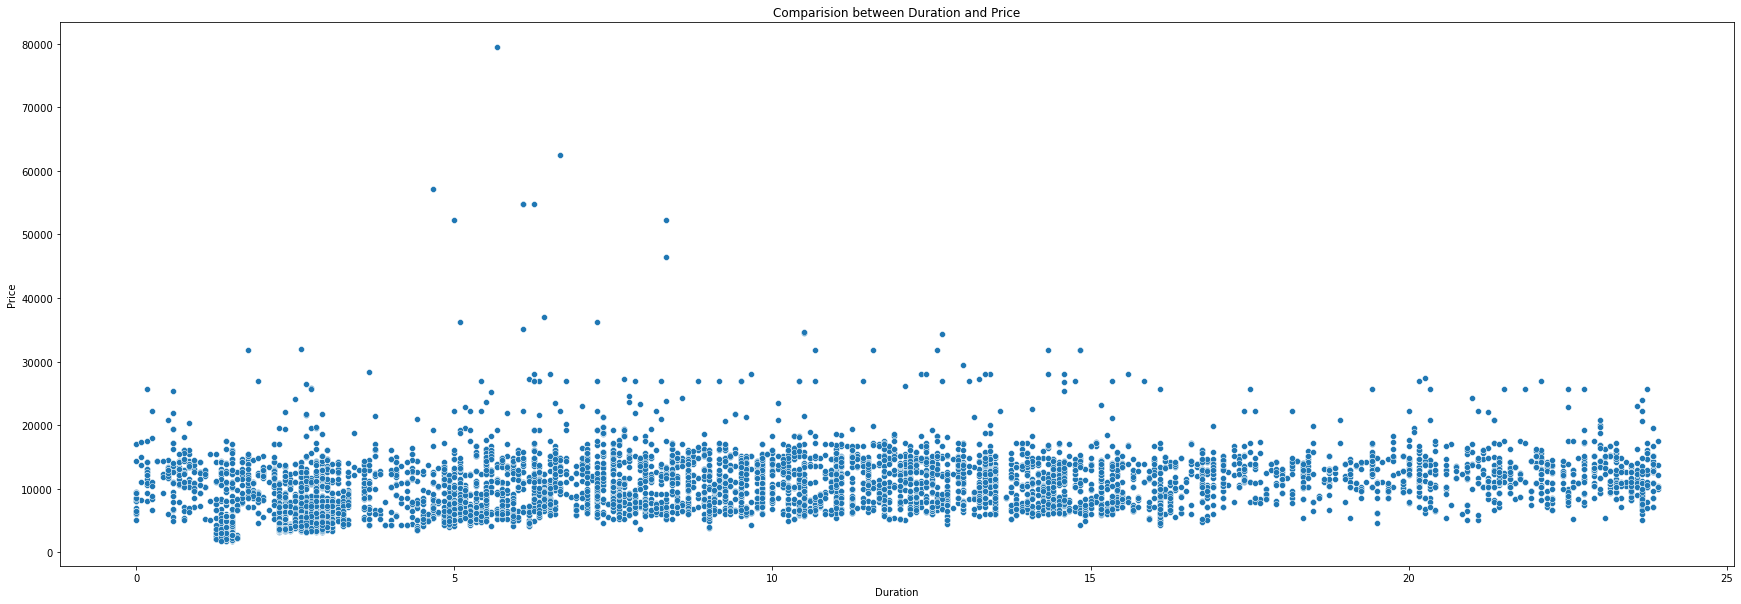

In [68]:
#Comparision between features using scatter plot
plt.figure(figsize=[30,10])
plt.title('Comparision between Duration and Price')
sns.scatterplot(df['Duration'],df['Price'],data=df,palette="husl")
plt.show()

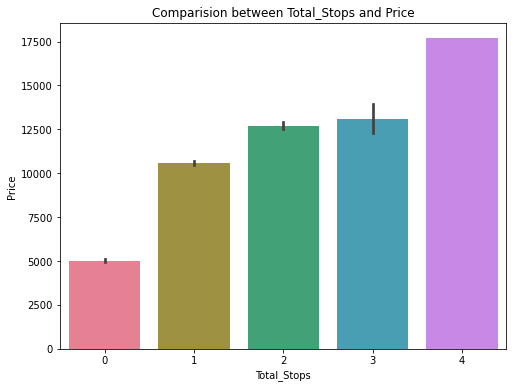

In [69]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Total_Stops and Price')
sns.barplot(df['Total_Stops'],df['Price'],data=df,palette="husl")
plt.show()

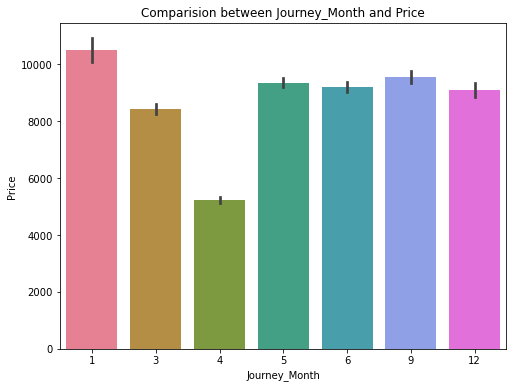

In [70]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Journey_Month and Price')
sns.barplot(df['Journey_Month'],df['Price'],data=df,palette="husl")
plt.show()

In 1 Month price is high 

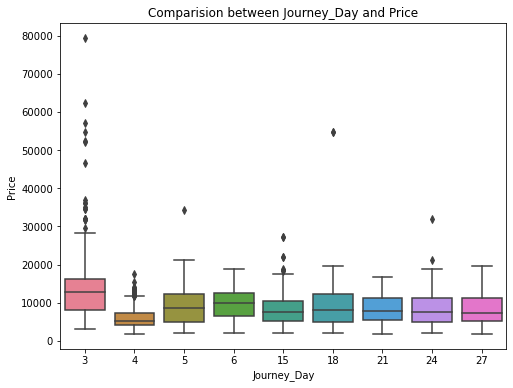

In [71]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Journey_Day and Price')
sns.boxplot(df['Journey_Day'],df['Price'],data=df,palette="husl")
plt.show()

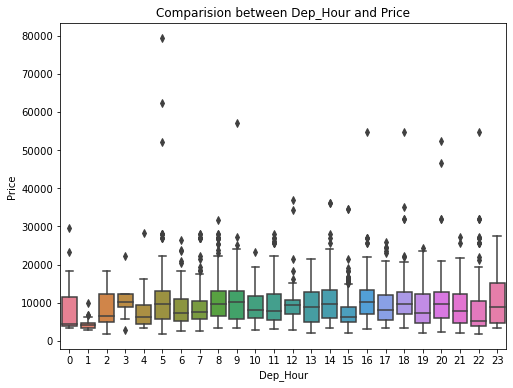

In [72]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Dep_Hour and Price')
sns.boxplot(df['Dep_Hour'],df['Price'],data=df,palette="husl")
plt.show()

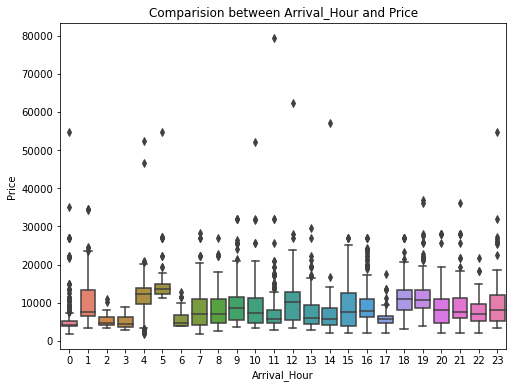

In [73]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Arrival_Hour and Price')
sns.boxplot(df['Arrival_Hour'],df['Price'],data=df,palette="husl")
plt.show()

### Checking for outliers

<AxesSubplot:>

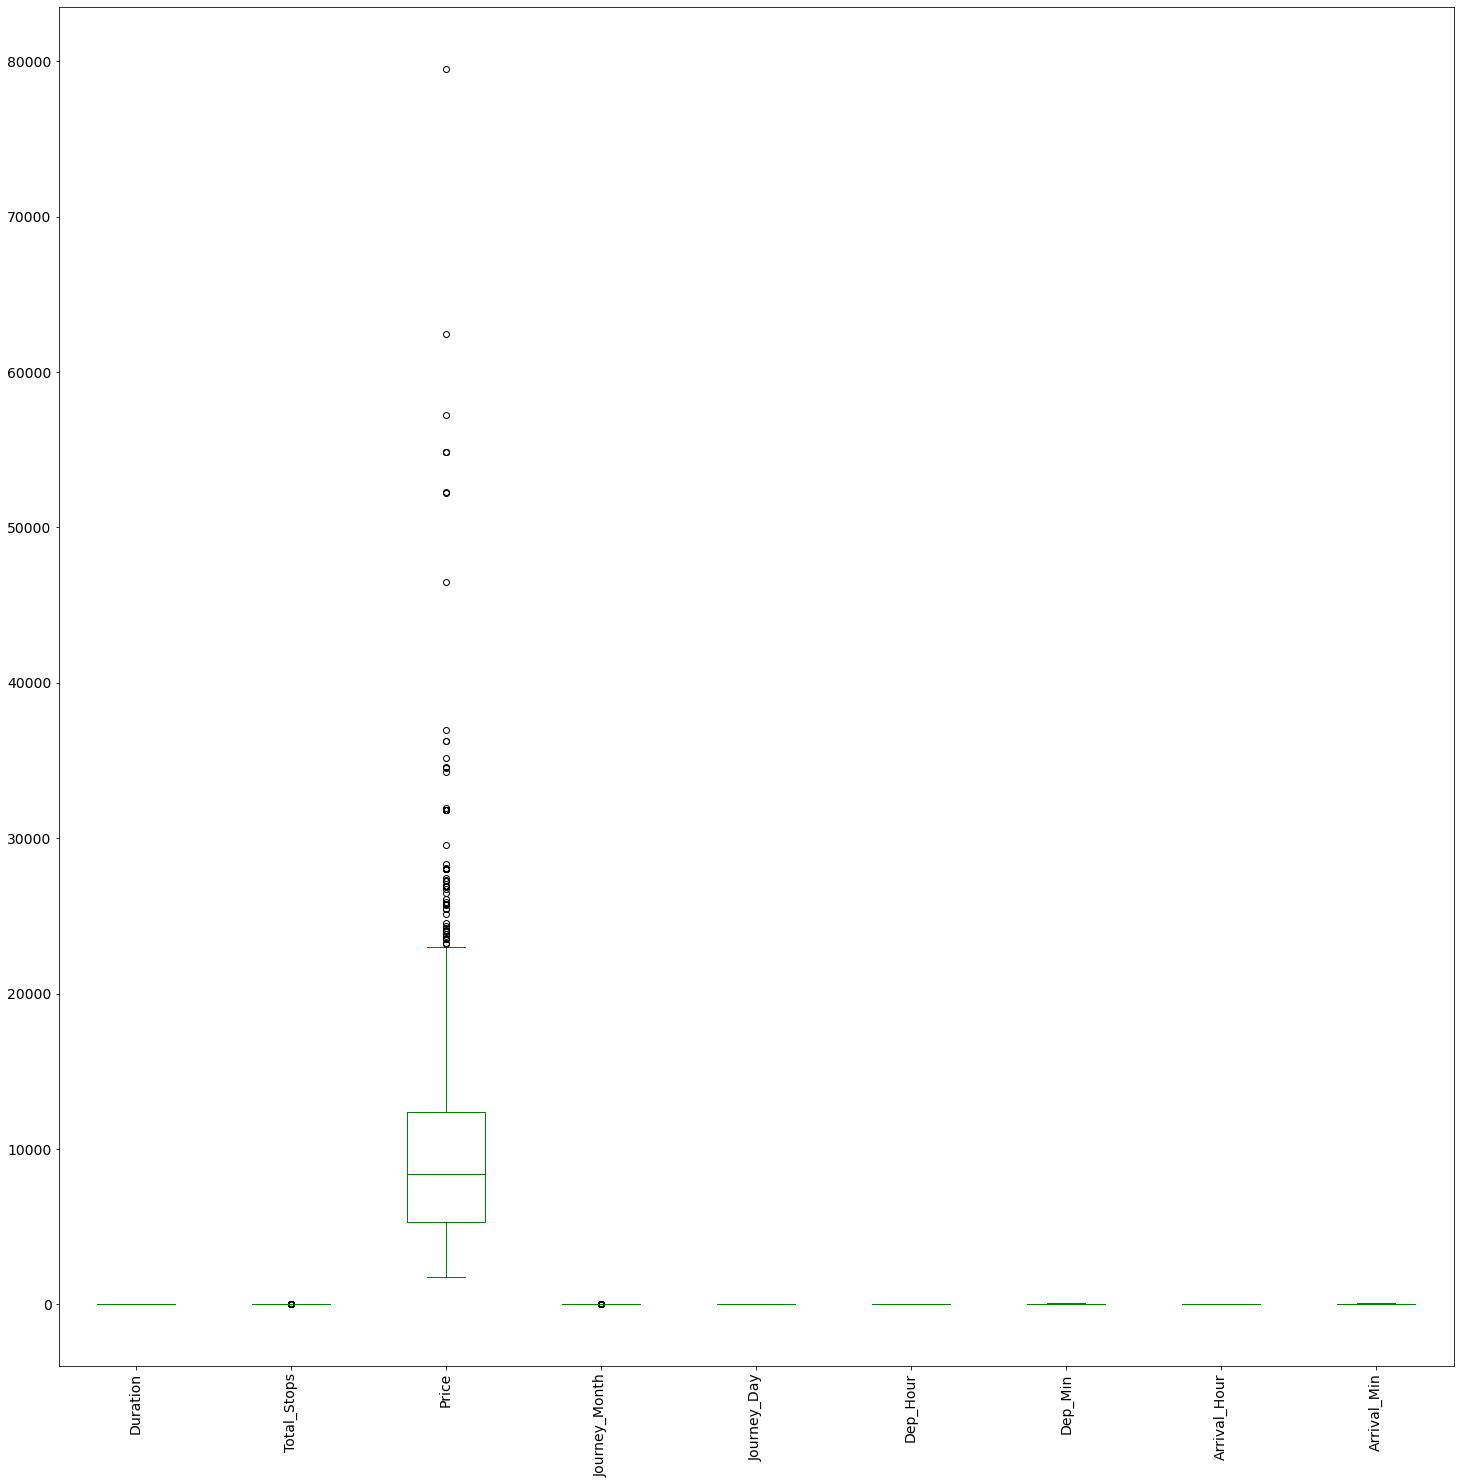

In [74]:
#Checking for outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='g')

Lets try to remove outliers

In [75]:
#Features having outliers
features=df[['Journey_Month']]

In [76]:
Q1=features.quantile(0.25)

Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [77]:
#Checking shape of new dataset
df_1.shape

(9726, 14)

In [78]:
#Checking shape of old dataset
df.shape

(10683, 14)

In [79]:
#Checking dataloss in IQR method
Dataloss = (((10683-9726)/10683)*100)
Dataloss

8.958157820836844

In [80]:
#Checking for skewness
df_1.skew()

Duration         0.851356
Total_Stops      0.315096
Price            1.892394
Journey_Month    0.179871
Journey_Day      0.205870
Dep_Hour         0.123756
Dep_Min          0.177822
Arrival_Hour    -0.374118
Arrival_Min      0.111059
dtype: float64

##### Removing skewness using yeo-johnson method

In [82]:
#Creating a list of skewed features
f=["Duration"]

In [83]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [84]:
df_1[f] = scaler.fit_transform(df_1[f].values)

In [85]:
#Checking for skewness
df_1.skew()

Duration         0.000721
Total_Stops      0.315096
Price            1.892394
Journey_Month    0.179871
Journey_Day      0.205870
Dep_Hour         0.123756
Dep_Min          0.177822
Arrival_Hour    -0.374118
Arrival_Min      0.111059
dtype: float64

As we see skewness has been removed

### Label Encoding

In [86]:
cat_col=[]
for i in df_1.dtypes.index:
    if df_1.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


In [87]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_1[cat_col]= df_1[cat_col].apply(LE.fit_transform)

In [89]:
# check the datatype agian 
df_1.dtypes

Airline              int32
Source               int32
Destination          int32
Route                int32
Duration           float64
Total_Stops          int64
Additional_Info      int32
Price                int64
Journey_Month        int64
Journey_Day          int64
Dep_Hour             int64
Dep_Min              int64
Arrival_Hour         int64
Arrival_Min          int64
dtype: object

As we see there is no categorical column present in dataset

<AxesSubplot:>

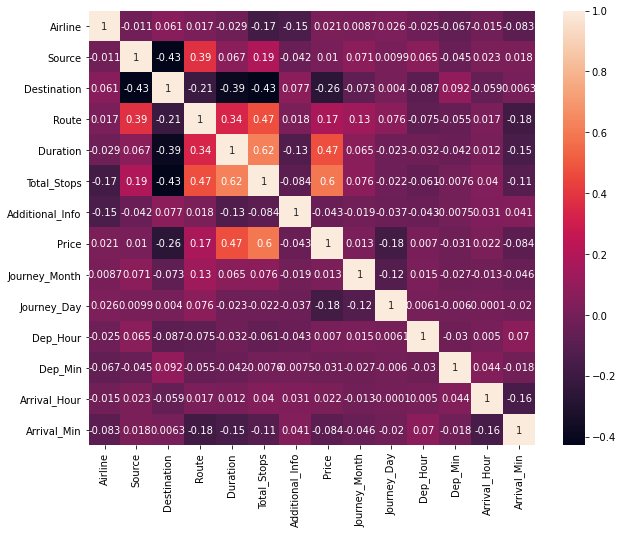

In [90]:
# Visualizing the correlation matrix heat map.
plt.figure(figsize=(10,8))
sns.heatmap(df_1.corr(),annot = True)

## 2.Test dataset

In [91]:
#Printing test dataset
dff.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [92]:
#Checking shape of test dataset
dff.shape

(2671, 10)

In [93]:
#Checking all column names
dff.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [94]:
#Checking the info about the dataset(Test data)
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


As we see there is no null value and all are object type data

In [95]:
#Lets check the value count of each column 
for i in dff.columns:
        print(dff[i].value_counts())
        print('*****************************************************************')

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
*****************************************************************
9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
1/04/2019      78
24/03/2019     78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/03/2019     65
27/05/2019     65
3/03/2019      62
1/05/2019      62
9/03/2019      55
12/03/2019     43
18/03

In [96]:
#Converting object data type to datetime 
dff['Date_of_Journey'] =  pd.to_datetime(dff['Date_of_Journey'])
dff['Dep_Time'] =  pd.to_datetime(dff['Dep_Time'])
dff['Arrival_Time'] =  pd.to_datetime(dff['Arrival_Time'])

In [98]:
#Extracting journey year

#Extracting year
dff["Journey_Year"]=pd.to_datetime(dff.Date_of_Journey, format="%d/%m/%Y").dt.year

#Extracting month
dff["Journey_Month"]=pd.to_datetime(dff.Date_of_Journey, format="%d/%m/%Y").dt.month

#Extracting day
dff["Journey_Day"]=pd.to_datetime(dff.Date_of_Journey, format="%d/%m/%Y").dt.day

In [99]:
#Droping Date_of_journey column after extraction
dff = dff.drop(["Date_of_Journey"],axis=1)

In [100]:
#Extracting Duration column using Arrival_Time and Dep_Time
Difference = (dff["Arrival_Time"]-dff["Dep_Time"])
Difference_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600
    Difference_list.append(duration)
dff["Duration"] = Difference_list

In [101]:
#Extracting hours and minutes from Dep_time

#Extracting Hours
dff["Dep_Hour"]=pd.to_datetime(dff["Dep_Time"]).dt.hour

#Extracting Hours
dff["Dep_Min"]=pd.to_datetime(dff["Dep_Time"]).dt.minute

In [102]:
dff = dff.drop(["Dep_Time"],axis=1)

In [103]:
#Extracting Hours
dff["Arrival_Hour"]=pd.to_datetime(dff["Arrival_Time"]).dt.hour

#Extracting Hours
dff["Arrival_Min"]=pd.to_datetime(dff["Arrival_Time"]).dt.minute

In [104]:
dff = dff.drop(["Arrival_Time"],axis=1)

In [105]:
#Dataset after extraction 
dff.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Year,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10.916667,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4.000000,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23.750000,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13.000000,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2.833333,non-stop,No info,2019,6,24,23,55,2,45


In [106]:
# Checking for null value
dff.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Journey_Year       0
Journey_Month      0
Journey_Day        0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

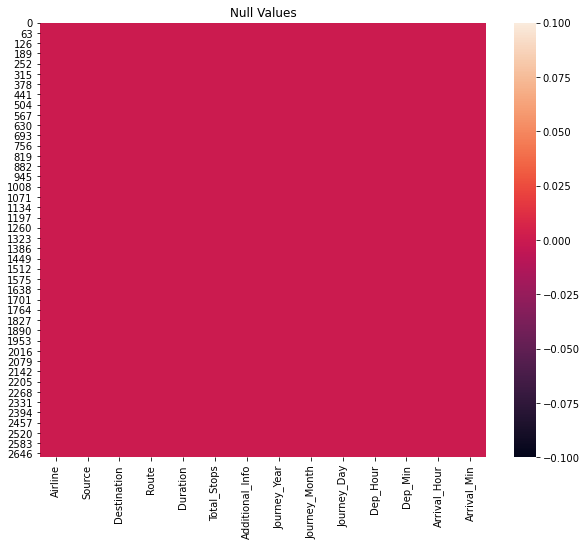

In [107]:
# lets visualize the null value
plt.figure(figsize=[10,8])
sns.heatmap(dff.isnull())
plt.title('Null Values')
plt.show()

No NAN present in our dataset

In [108]:
#Lets check the value counts now
for i in dff.columns:
        print(dff[i].value_counts())
        print('****************************************')

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
****************************************
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
****************************************
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
****************************************
DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → 

In [109]:
# we can drop Journey_year column as having same value also we can do grouping for data
dff = dff.drop(["Journey_Year"],axis=1)


#Grouping Airlines column
dff["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)

dff["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)

dff["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)


# Grouping Destination column
dff["Destination"].replace("New_Delhi","Delhi",inplace=True)

#Grouping Additional_Info column
dff["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)

dff["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)

dff["Additional_Info"].replace("No Info","No info",inplace=True)

In [110]:
#Let me assign values for Total_Stops column
dff.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace = True)

In [111]:
# check description of dataset
dff.describe()

,Duration,Total_Stops,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,8.308187,0.833396,5.607263,12.026956,12.603519,24.891426,13.585174,24.558218
std,6.331450,0.672315,3.042952,8.564408,5.686673,19.086522,7.040396,16.775436
min,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,2.833333,0.000000,3.000000,5.000000,8.000000,5.000000,8.000000,10.000000
50%,6.500000,1.000000,5.000000,6.000000,12.000000,25.000000,15.000000,25.000000
75%,12.583333,1.000000,6.000000,21.000000,18.000000,45.000000,19.000000,35.000000
max,23.916667,4.000000,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000


<AxesSubplot:>

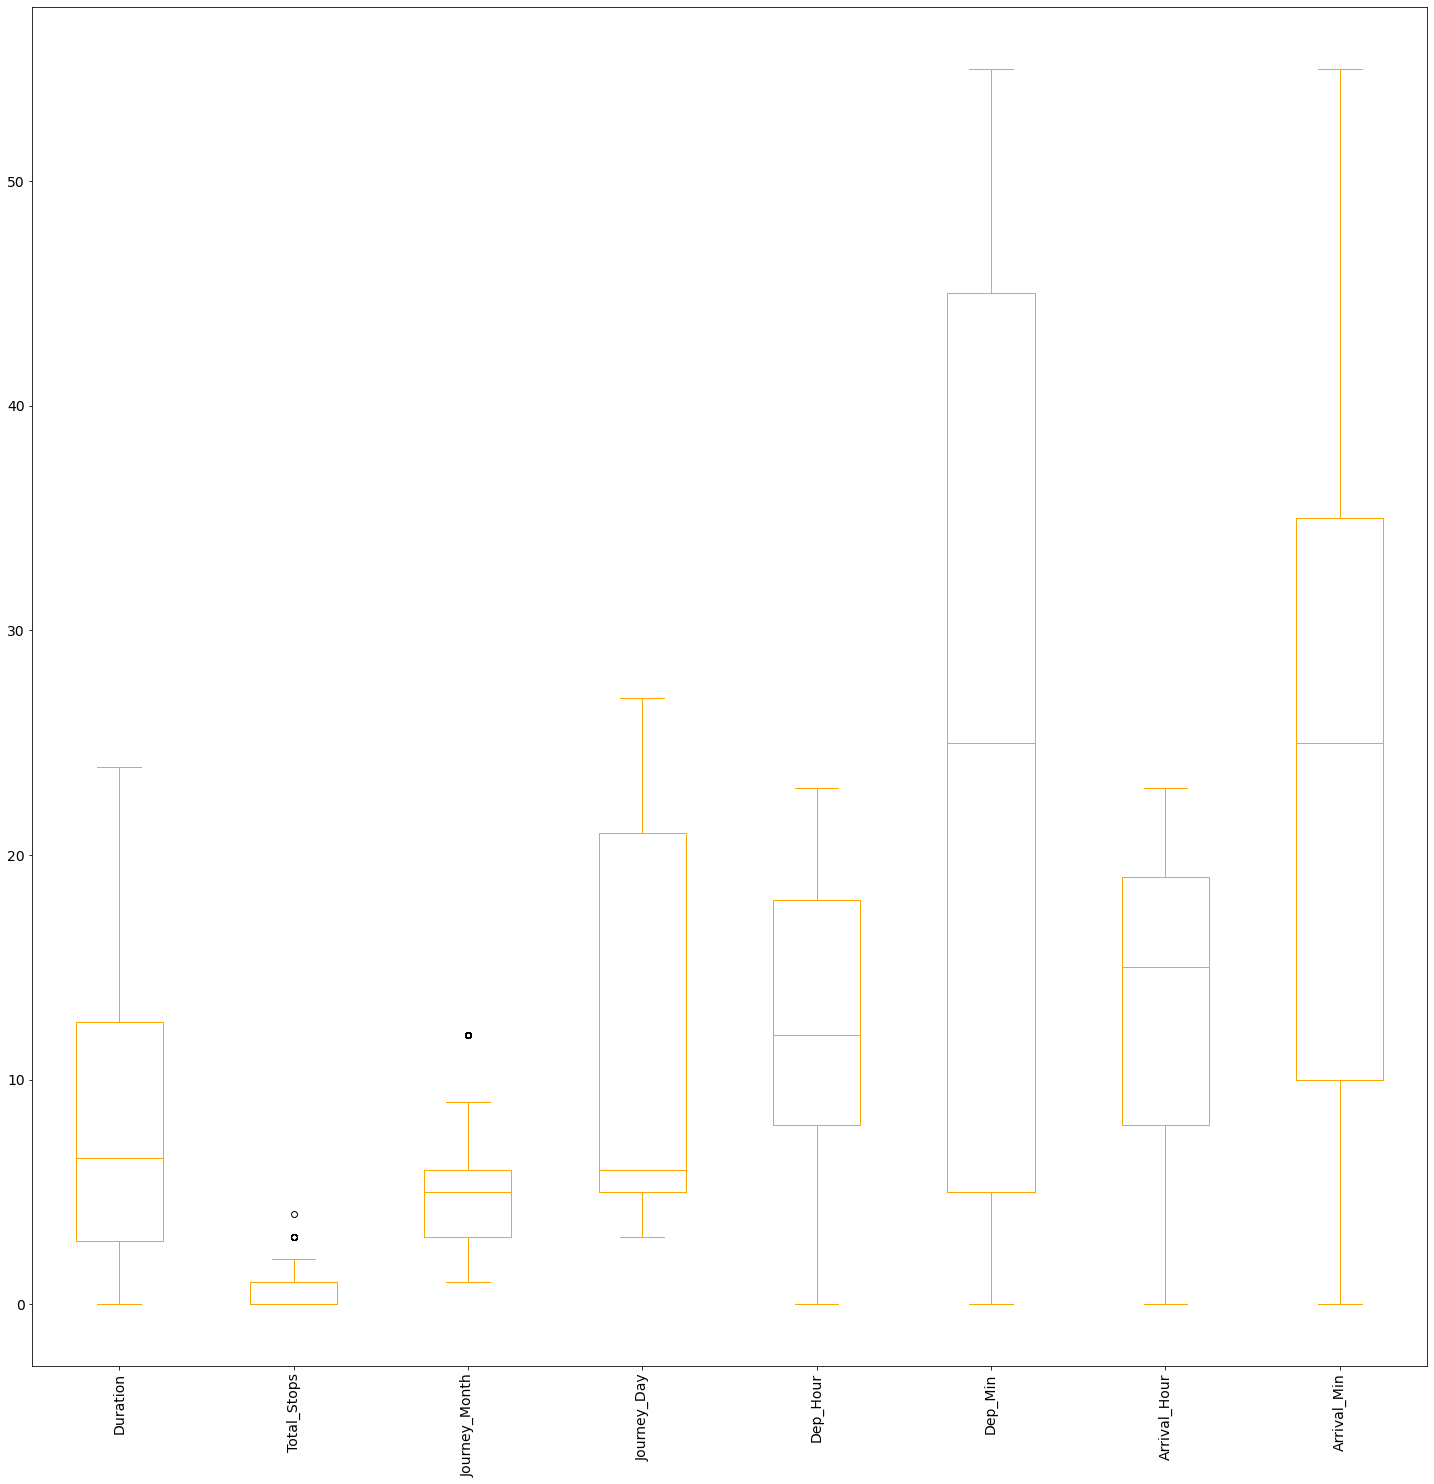

In [112]:
#checking for outliers using boxplot
dff.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='Orange')

In [113]:
#Features having outliers are
features=dff[['Journey_Month']]

## Lets remove outlier using Zscore method

In [114]:
from scipy.stats import zscore
z=np.abs(zscore(features))
dff_new=dff[(z<3).all(axis=1)]
dff_new

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10.916667,1,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4.000000,1,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23.750000,1,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13.000000,1,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2.833333,0,No info,6,24,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23.916667,1,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2.583333,0,No info,3,27,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6.583333,1,No info,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15.250000,1,No info,6,3,4,0,19,15


In [115]:
#checking the new dataset shape
dff_new.shape

(2671, 13)

In [116]:
#checking the old dataset shape
dff.shape

(2671, 13)

there is no dataloss in zscore method which means it has not removed any outliers

In [118]:
# IQR Method
# 1st quantile 

Q1=features.quantile(0.25)

# 3rd quantile

Q3=features.quantile(0.75)

# IQR

IQR=Q3 - Q1 


dff_1=dff[~((dff < (Q1 - 1.5 * IQR)) |(dff > (Q3 + 1.5 * IQR))).any(axis=1)]

In [119]:
# checking  the  new dataset shape
dff_1.shape

(2414, 13)

In [120]:
#checking dataloss in IQR method

Dataloss = (((2671-2414)/2671)*100)
Dataloss

9.621864470235867

Now we have sucessfully removed the outliers

### Checking for Skewness

In [121]:
dff_1.skew()

Duration         0.812134
Total_Stops      0.327634
Journey_Month    0.156564
Journey_Day      0.310730
Dep_Hour         0.107732
Dep_Min          0.126943
Arrival_Hour    -0.444721
Arrival_Min      0.096564
dtype: float64

In [122]:
f2 = ["Duration"]
scaler2 = PowerTransformer(method='yeo-johnson')

In [123]:
dff_1[f2] = scaler2.fit_transform(dff_1[f2].values)

In [124]:
# again check skewness
dff_1.skew()

Duration        -0.013380
Total_Stops      0.327634
Journey_Month    0.156564
Journey_Day      0.310730
Dep_Hour         0.107732
Dep_Min          0.126943
Arrival_Hour    -0.444721
Arrival_Min      0.096564
dtype: float64

Now skewness is also removed

### Label Encoding

In [125]:
# Separating categorical columns in dff_1
cat_col2=[]
for i in dff_1.dtypes.index:
    if dff_1.dtypes[i]=='object':
        cat_col2.append(i)
print(cat_col2)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


In [126]:
LE2=LabelEncoder()
dff_1[cat_col2]= dff_1[cat_col2].apply(LE2.fit_transform)

In [128]:
# check type od dataset again
dff_1.dtypes

Airline              int32
Source               int32
Destination          int32
Route                int32
Duration           float64
Total_Stops          int64
Additional_Info      int32
Journey_Month        int64
Journey_Day          int64
Dep_Hour             int64
Dep_Min              int64
Arrival_Hour         int64
Arrival_Min          int64
dtype: object

Now all data are numeri cal type

<AxesSubplot:>

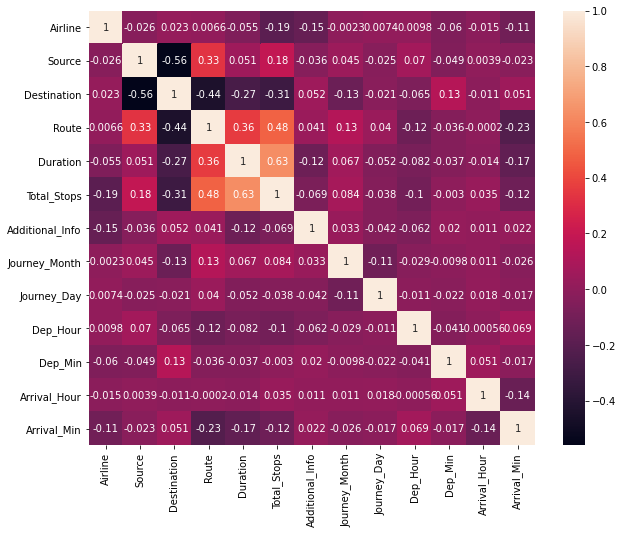

In [129]:
#visualizing the correlation matrix  heat map

plt.figure(figsize=(10,8))
sns.heatmap(dff_1.corr(),annot = True)

In [130]:
#Scaling the data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_1= pd.DataFrame(scaler.fit_transform(dff_1),columns=dff_1.columns)

In [131]:
#Checking for multicolinearity issue using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x_1.values, i) for i in range(x_1.shape[1])]
vif["Features"]=x_1.columns
vif

,vif_Features,Features
0,1.108358,Airline
1,1.541205,Source
2,1.765313,Destination
3,1.660388,Route
4,1.799906,Duration
5,2.053627,Total_Stops
6,1.068959,Additional_Info
7,1.043111,Journey_Month
8,1.030972,Journey_Day
9,1.048189,Dep_Hour


No multicolinearity issue found

## MODEL BUILDING FROM TRAIN DATASET
Separating features and label in train dataset

In [132]:
x = df_1.drop("Price",axis=1)
y = df_1["Price"]

In [133]:
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [134]:
x.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,16,-0.848535,0,6,3,24,22,20,1,10
1,1,3,0,78,0.232876,2,6,1,5,5,50,13,15
2,4,2,1,112,1.420381,2,6,9,6,9,25,4,25
4,3,0,2,27,-0.290740,1,6,1,3,16,50,21,35
5,6,3,0,58,-1.006944,0,6,6,24,9,0,11,25


#### Finding Best Random State and Accuracy

In [135]:
#importing required libraries

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [136]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9112746553213404  on Random_state  141


In [137]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

In [139]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

### 1)RandomForestRegressor

In [140]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.914791833340036
mean_squared_error: 1749281.1581218466
mean_absolute_error: 654.2963511319996
root_mean_squared_error: 1322.603930933916


### 2) ExtraTreeRegressor

In [141]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.906049234421981
mean_squared_error: 1928762.3529397107
mean_absolute_error: 648.9301993374457
root_mean_squared_error: 1388.7988885867208


### 3) GradientBoostingRegressor

In [142]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8191560226984984
mean_squared_error: 3712636.6456839973
mean_absolute_error: 1279.3704284008056
root_mean_squared_error: 1926.820345980392


### 4) DecisionTreeRegressor

In [143]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8613475966676858
mean_squared_error: 2846464.6780328993
mean_absolute_error: 712.8223669179804
root_mean_squared_error: 1687.146904698254


### 5) KNN

In [144]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7068627116423043
mean_squared_error: 6017962.3076901985
mean_absolute_error: 1457.583002056203
root_mean_squared_error: 2453.1535434395864


## Hyper Parameter Tuning

I am trying to  increase accuracy for RandomForestRegressor as it is best model as per my observation

In [145]:
from sklearn.model_selection import GridSearchCV

In [149]:
parameters = {
            'random_state' : [10, 50, 1000],
              'min_samples_split':[2,3],
              'n_estimators' : [50,100, 200, 300]}

In [150]:
GCV =GridSearchCV(RandomForestRegressor(),parameters,cv=4)

In [151]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [2, 3],
                         'n_estimators': [50, 100, 200, 300],
                         'random_state': [10, 50, 1000]})

In [152]:
GCV.best_params_

{'min_samples_split': 2, 'n_estimators': 300, 'random_state': 50}

In [161]:
RFR=RandomForestRegressor(n_estimators=300, min_samples_split=2, random_state=50)
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9120973052236259
mean_squared_error: 1804598.47627136
mean_absolute_error: 656.3094611134684
root_mean_squared_error: 1343.353444284623


### Saving the Model

In [164]:
import pickle
filename= 'Fligth Price Predictiom'
pickle.dump(RFR, open(filename,'wb'))

### Predicting Flight Price for test dataset using Saved model of trained dataset

In [166]:
# Loading the saved model

filename = 'Fligth Price Predictiom'
model = pickle.load(open(filename, 'rb'))

#Prediction

prediction = model.predict(X_test)
prediction

array([14513.        ,  8619.82      ,  3682.57666667, ...,
        6317.2       ,  5129.48      , 10565.40066667])

In [167]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,2908,2909,2910,2911,2912,2913,2914,2915,2916,2917
Predicted,14513.0,8619.82,3682.576667,6477.466667,5734.413333,11231.896667,12171.486667,6083.543333,10844.0,7968.95,...,12550.21,14729.623333,2915.513333,13211.613333,17391.083333,5735.373333,4894.263333,6317.2,5129.48,10565.400667
Actual,14781.0,8372.00,3540.000000,5704.000000,5438.000000,11150.000000,12273.000000,5761.000000,10844.0,7690.00,...,14588.00,14714.000000,2754.000000,13885.000000,17471.000000,6347.000000,4995.000000,4959.0,6015.00,9103.000000


Above are the predicted values and the actual values but they are alomost similar

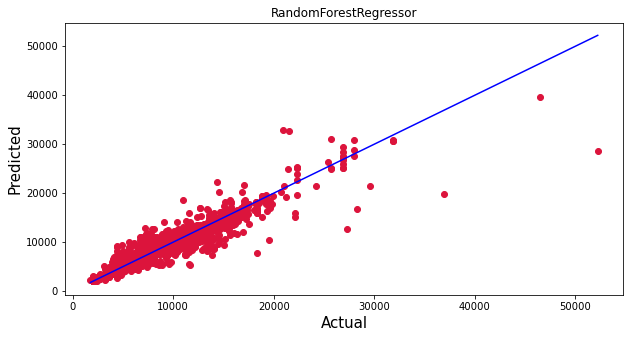

In [168]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("RandomForestRegressor")
plt.show()

In [169]:
#Predicting flight price using cleaned test dataset dff_1
Predicted_FlightPrice=model.predict(dff_1)
Predicted_FlightPrice

array([ 9389.06      ,  9373.42333333,  9395.82666667, ...,
        6326.42      , 12473.14      ,  9444.25      ])

In [170]:
#Making dataframe for predicted Price
FlightPricePredictions=pd.DataFrame()
FlightPricePredictions["Price"]=Predicted_FlightPrice
FlightPricePredictions

,Price
0,9389.060000
1,9373.423333
2,9395.826667
3,15766.103333
4,5170.610000
...,...
2409,12560.000000
2410,5116.566667
2411,6326.420000
2412,12473.140000


In [171]:
#Lets save the predictions to csv
FlightPricePredictions.to_csv("FlightPricePredictions.csv",index=False)